In [1]:
include("/Users/gr_1/Documents/IsoFlex/IsoFlex.jl")
using Plots
gr()

Plots.GRBackend()

# Loading
#### Initial load should be in line with Mike's gravity model - 200 km wide with linear decrease to ~37.5 Mpa, double that and reversed sign on the opposite side of the fault (center of the model domain) 

#### we assume lithosphere is ~ 100 km, so 70 Mpa is about 2500m of crust at 2.75 g/cc


#### The spatial extent of the anomaly indicates it is approximately ~ 200 km long, we extend it therefore from 350:650 km within the model domain width

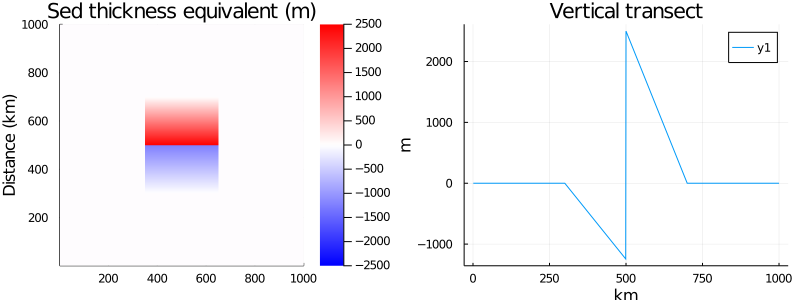

In [2]:
L = zeros(1000,1000)

maxsed = 2500 #Maximum sediment thickness at rho = 2750 kg/m3

for i =300:499
    L[i, 350:650] .= - (i - 300) / 200 .* maxsed/2; #Minima is about half the maximum
end

for i =500:700
    L[i, 350:650] .= (700 - i ) / 200 .* maxsed;
end

p = heatmap(L,c=:bwr,clims=(-2500,2500),ylabel = "Distance (km)", title = "Sed thickness equivalent (m)")
plot(p, plot(L[:,500],xlabel = ("km"), ylabel="m",title="Vertical transect"),size=(800,300))

## First is the test with uniform Te 20 km, no in-plane stress

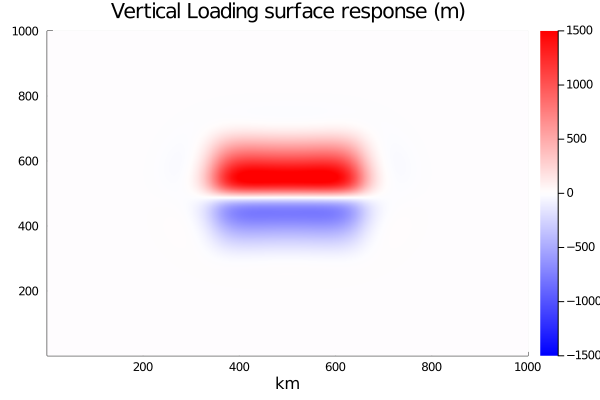

In [3]:
dy = 1000.0
dx = 1000.0
E = 100e9
g = 9.81
v = .25
pm = 3300.0
pc = 2750.0
buffer = 0
ncores = 5
pw = 0
firstiter=true
Te = 10e3
m,n = size(L);


w_0 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx)
w_1 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 10^12)
w_3 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 3* 10^12)
w_10 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx,Ny= 10* 10^12)

heatmap(w_0,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-1500,1500))

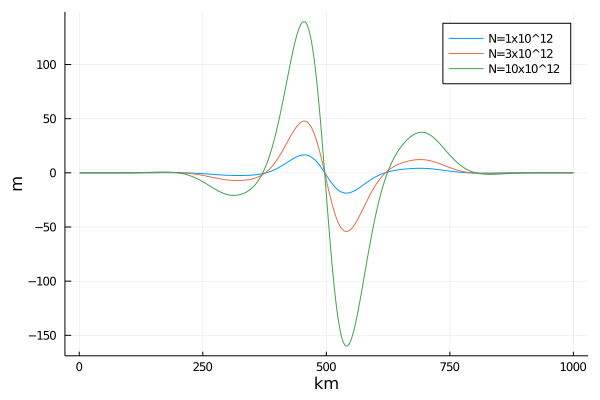

In [4]:
v1 = w_1-w_0
v3 = w_3-w_0
v10 = w_10-w_0
plot(v1[:,500],xlabel="km",ylabel="m",label="N=1x10^12")
plot!(v3[:,500],xlabel="km",ylabel="m",label="N=3x10^12")
plot!(v10[:,500],xlabel="km",ylabel="m",label="N=10x10^12")

# Variable Te

### The Elastic thickness is high for Australian Craton as a whole according to Tesauro et al., 2011 - however locally it may be much lower within the basins, as low as 10 km

### We need a smooth function though, not abrupt changes in Te - something like a gaussian surface

In [5]:
Te = zeros(1000,1000)
Te[300:700, 350:650] .= 0e3 #Minima is about half the maximum

for i = 1:1000
    for j = 1:1000
        r = sqrt((i-500)^2 + (j-500)^2)
        Te[i, j] = 60e3 - 55e3 * exp(-r/20^2)
    end
end


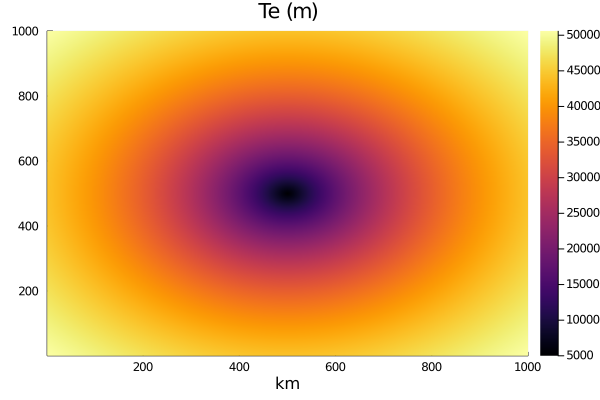

In [6]:
heatmap(Te,xlabel="km",title="Te (m)")

## Now calculate the flexural response without any in-plane stress and variable Te 

In [7]:

## Can take a few seconds to converge
w = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3)


114.71126331540552
82.44268042803515
63.33663640842974
50.73378077890493
41.87660272399694
35.36529329601649
30.407645263063614
26.52379587678888
23.409141442573173
20.862956850784485
18.750670399243518
16.973023419662468
15.460020327173197
14.159482642352259
13.032002847568265
12.048039416314623
11.182289732439813
10.4154856572693
9.73303031940759
9.123259950805277
8.574063299996396
8.07920389247306
7.629982289822465
7.22155070302415
6.848323215099299
6.515646393094244
6.218811153226909
5.944233561948863
5.687735830835834
5.449847102702961
5.226543223540716
5.018560628425007
4.822854055036601
4.639449803766183
4.4669022912846685
4.303844084082925
4.150897022329389
4.005827046311879
3.8685599230334446
3.7390385063235385
3.6157760211009418
3.4986643774414006
3.3879206777285162
3.2822155933527597
3.181237876116427
3.0855437342201526
2.9941559906591237
2.906631987612627
2.8227499543544923
2.743157781702166
2.6667690613840023
2.5933959309323313
2.522876843609424
2.455570886399414
2.3910098

1000×1000 Array{Float64,2}:
 0.459442  0.459404  0.459341  0.459254  …  0.459403  0.459441  0.459454
 0.461529  0.461493  0.461435  0.461353     0.461492  0.461528  0.46154 
 0.463595  0.463562  0.463508  0.463431     0.463561  0.463595  0.463606
 0.465642  0.465612  0.465561  0.465489     0.465611  0.465642  0.465652
 0.46767   0.467642  0.467595  0.467529     0.467641  0.46767   0.467679
 0.469681  0.469655  0.469612  0.469551  …  0.469654  0.46968   0.469689
 0.471674  0.47165   0.471611  0.471556     0.471649  0.471673  0.471681
 0.47365   0.473629  0.473594  0.473544     0.473628  0.47365   0.473657
 0.475612  0.475593  0.475561  0.475516     0.475591  0.475611  0.475618
 0.477558  0.477542  0.477514  0.477474     0.47754   0.477558  0.477563
 0.479491  0.479477  0.479452  0.479418  …  0.479475  0.47949   0.479496
 0.481411  0.481399  0.481378  0.481349     0.481397  0.48141   0.481415
 0.483318  0.483309  0.483292  0.483268     0.483307  0.483318  0.483321
 ⋮                     

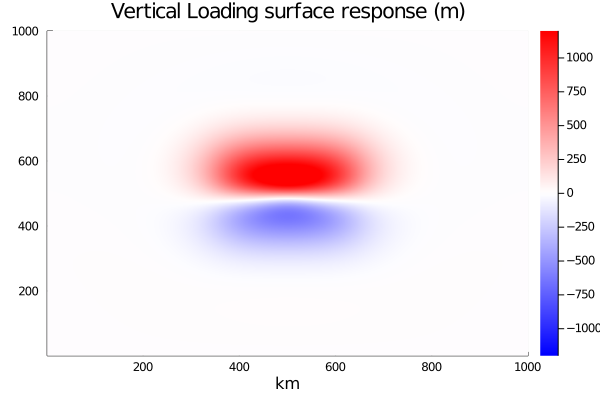

In [9]:
heatmap(w,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-1200,1200))

### Now run with the in-plane stress of 3e12

In [10]:
w3 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3,Ny=3e12)


113.61573451100617
81.43117356091068
62.40516768658324
49.8710040877105
41.076063369421604
34.61754224414642
29.704451453756633
25.862065042457743
22.782812094416386
20.270643231564463
18.187518122008214
16.43662742677543
14.948291688181826
13.670588971895086
12.564043393432257
11.5982014901399
10.750901142437442
10.001389335641989
9.334278436989734
8.738835277556518
8.204044875791396
7.721018591041684
7.284665039285073
6.886730449776678
6.538814961379387
6.2277972651974665
5.939790569359275
5.672489340036918
5.424440227274658
5.192875364126394
4.977221934994759
4.775188322112513
4.586032496990015
4.408642713898871
4.2413291853372925
4.0846888248704545
3.9363852616794475
3.796476881349804
3.664519163725174
3.539145083946039
3.4205349322178904
3.308238751489
3.201213436151079
3.0993559037657405
3.0029394443017736
2.910794037582491
2.82266395348762
2.7388185205147693
2.6588847075099693
2.582250615364728
2.5087321909556977
2.4385163432057766
2.371449275907537
2.3069738206148145
2.24495474

1000×1000 Array{Float64,2}:
 0.446351  0.446311  0.446245  0.446152  …  0.44631   0.44635   0.446364
 0.448616  0.448579  0.448517  0.44843      0.448578  0.448616  0.448629
 0.450861  0.450827  0.450768  0.450686     0.450825  0.450861  0.450873
 0.453087  0.453054  0.453     0.452923     0.453053  0.453086  0.453098
 0.455293  0.455263  0.455212  0.455141     0.455262  0.455293  0.455303
 0.457482  0.457454  0.457407  0.457341  …  0.457452  0.457481  0.457491
 0.459652  0.459627  0.459584  0.459523     0.459625  0.459652  0.459661
 0.461807  0.461783  0.461744  0.461689     0.461782  0.461806  0.461814
 0.463945  0.463924  0.463888  0.463838     0.463923  0.463945  0.463952
 0.466069  0.46605   0.466018  0.465973     0.466048  0.466068  0.466075
 0.468178  0.468161  0.468133  0.468094  …  0.46816   0.468177  0.468183
 0.470274  0.470259  0.470235  0.470201     0.470258  0.470273  0.470278
 0.472357  0.472345  0.472324  0.472295     0.472344  0.472356  0.472361
 ⋮                     

In [13]:
w10 = IsoFlex.flexural(L;Te = Te, E = E, v = v, g = g, pm = pm, pc = pc, buffer = buffer, ncores = ncores, dy = dy, dx = dx, Te0=60e3,Ny=10e12)


111.1240670655668
79.143331685372
60.305210133157516
47.93629238964843
39.283845689609734
32.948769015335984
28.143753982352678
24.393950486400968
21.40046373588109
18.96362325398627
16.94805199050211
15.258979219628372
13.827481194620987
12.602251009035854
11.544324908266844
10.623601173958377
9.816478206347028
9.104211671809026
8.473933540092958
7.9113893485930475
7.406902365886708
6.95407976636443
6.567355110687572
6.222872127106939
5.906030619979333
5.615080466406653
5.345550742515343
5.096485628843595
4.865044281885162
4.649922291257326
4.4492929902196465
4.262148548337279
4.086669340453852
3.9228139002950115
3.7683074845971305
3.6237317756257994
3.48729231505132
3.358357727012958
3.2372742872528306
3.1223739153304564
3.01347294825689
2.9108172062746576
2.8130960957863067
2.7199922457555203
2.6320902188036257
2.5482561059949376
2.4681661842657263
2.391801982540983
2.319329343241691
2.2499245576600515
2.1834138749021577
2.119734908590658
2.0591959243123483
2.0010573976489923
1.9451

1000×1000 Array{Float64,2}:
 0.416134  0.41609   0.416016  0.415912  …  0.416089  0.416134  0.416149
 0.418778  0.418736  0.418666  0.418567     0.418735  0.418777  0.418791
 0.4214    0.421361  0.421294  0.421201     0.42136   0.4214    0.421413
 0.424003  0.423966  0.423903  0.423815     0.423965  0.424003  0.424015
 0.426587  0.426552  0.426493  0.42641      0.42655   0.426586  0.426598
 0.429152  0.429119  0.429064  0.428986  …  0.429118  0.429151  0.429163
 0.431699  0.431668  0.431617  0.431545     0.431667  0.431698  0.431709
 0.434229  0.4342    0.434153  0.434086     0.434199  0.434228  0.434238
 0.436742  0.436716  0.436672  0.43661      0.436715  0.436742  0.436751
 0.43924   0.439216  0.439176  0.439119     0.439215  0.43924   0.439248
 0.441723  0.441701  0.441664  0.441613  …  0.4417    0.441722  0.44173 
 0.444192  0.444172  0.444139  0.444092     0.444171  0.444191  0.444198
 0.446647  0.446629  0.4466    0.446558     0.446628  0.446646  0.446652
 ⋮                     

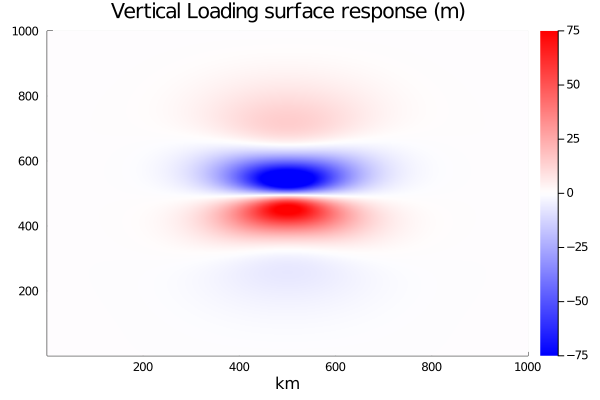

In [18]:
heatmap(w10 .- w,xlabel="km",title = "Vertical Loading surface response (m)",c=:bwr,clims=(-75,75))

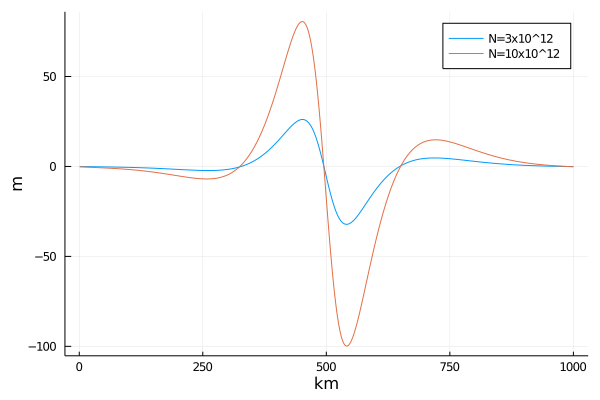

In [23]:
v3 = w2.-w
v10 = w10.-w

plot(v3[:,500],xlabel="km",ylabel="m",label="N=3x10^12")
plot!(v10[:,500],xlabel="km",ylabel="m",label="N=10x10^12")